## Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Collection & Analysis

In [3]:
dataset = pd.read_csv('Diabetes Dataset Female.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Separate Column and Label
## Independent and Dependent Features

In [6]:
X = dataset.drop(['Outcome'], axis=1) #axis=1 for dropping a Col & axis=0 for Row
Y = dataset['Outcome'] #Outcome dependent feature
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Split the dataset

In [8]:
# stratify=X => means distribution of Y class labels would be approximately similar in both training & testing dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=4)
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
712           10      129             62             36        0  41.2   
486            1      139             62             41      480  40.7   
34            10      122             78             31        0  27.6   
622            6      183             94              0        0  40.8   
732            2      174             88             37      120  44.5   
..           ...      ...            ...            ...      ...   ...   
523            9      130             70              0        0  34.2   
38             2       90             68             42        0  38.2   
304            3      150             76              0        0  21.0   
300            0      167              0              0        0  32.3   
441            2       83             66             23       50  32.2   

     DiabetesPedigreeFunction  Age  
712                     0.441   38  
486                     0.536   21  


## Data Standardization
Data standardization, also known as feature scaling or normalization, is a preprocessing technique used in data analysis and machine learning to bring all feature variables to a similar scale. 

The main purpose of data standardization is to ensure that all features contribute equally to the analysis and modeling process, particularly in algorithms that are sensitive to the scale of the input features.

Many machine learning algorithms, such as support vector machines (SVM), k-nearest neighbors (KNN), and neural networks, are sensitive to the scale of input features. Standardizing the data helps these algorithms converge faster and can lead to better performance.

The convergence rate refers to how quickly these algorithms reach the optimal solution (or a satisfactory solution). 

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Training the model

In [10]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy Score

In [11]:
X_train_prediction = classifier.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [12]:
print('Accuracy Score on training' , training_data_accuracy) 

Accuracy Score on training 0.7932960893854749


In [13]:
X_test_prediction = classifier.predict(X_test_scaled)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [14]:
print('Accuracy Score on testing' , testing_data_accuracy) 

Accuracy Score on testing 0.7359307359307359


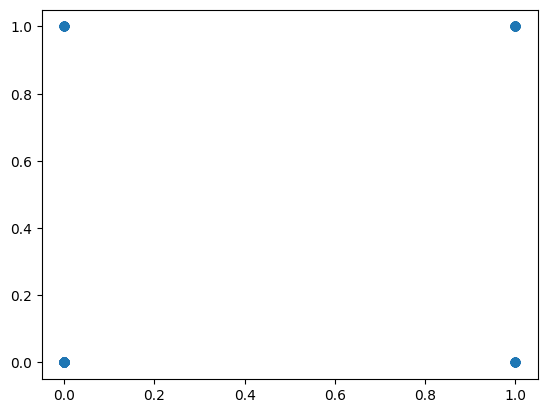

In [64]:
## Scatter Plot 
plt.scatter(Y_test,X_test_prediction)

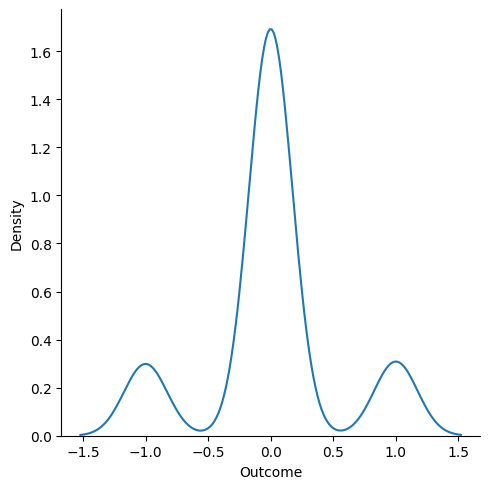

In [66]:
## Residuals
residuals=Y_test-X_test_prediction
sns.displot(residuals,kind="kde")

## Making a Predictive System

In [15]:
input_data = (10, 129, 62, 36, 0, 41.2, 0.441, 38)
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardized the input data
std_data = scaler.transform(input_data_reshaped)
# print (std_data)

prediction = classifier.predict(std_data)
print(prediction[0])
ans = 'Non Diabetic' if prediction[0]==0 else 'Diabetic'
print(ans)

1
Diabetic


C:\Users\91704\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Pickling The Model For Deployment

In [17]:
pickle.dump(classifier,open('classifier.pkl','wb'))

In [18]:
pickle_model = pickle.load(open('classifier.pkl','rb'))
pickle_scaler = pickle.load(open('scaling.pkl','rb'))

In [19]:
input_data = (10, 129, 62, 36, 0, 41.2, 0.441, 38)
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardized the input data
std_data = pickle_scaler.transform(input_data_reshaped)
# print (std_data)

prediction = pickle_model.predict(std_data)
print(prediction[0])
ans = 'Non Diabetic' if prediction[0]==0 else 'Diabetic'
print(ans)

1
Diabetic


C:\Users\91704\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
